In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
avg = 1
std_dev = .1
num_reps = 500
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

In [8]:
pct_to_target[0:20]

array([0.87, 0.95, 1.02, 0.97, 1.16, 0.95, 0.91, 1.06, 0.95, 0.83, 0.85,
       1.  , 1.1 , 0.95, 0.96, 1.22, 0.98, 0.86, 1.01, 0.97])

In [4]:
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

In [5]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,'Sales_Target': sales_target})

In [6]:
df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

In [7]:
df

,Pct_To_Target,Sales_Target,Sales
0,0.87,100000,87000.0
1,0.95,100000,95000.0
2,1.02,300000,306000.0
3,0.97,75000,72750.0
4,1.16,400000,464000.0
...,...,...,...
495,0.89,100000,89000.0
496,1.11,100000,111000.0
497,0.95,200000,190000.0
498,0.92,200000,184000.0


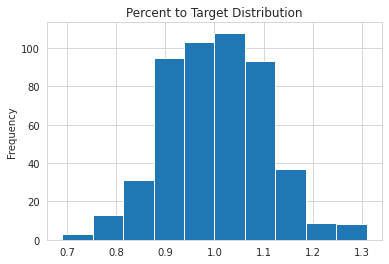

In [9]:
df['Pct_To_Target'].plot(kind='hist', title='Percent to Target Distribution')

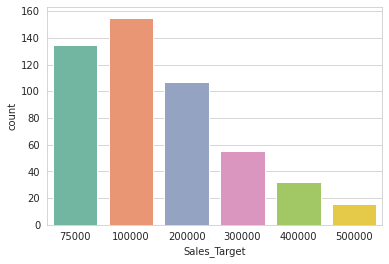

In [10]:
sns.countplot(x = 'Sales_Target', data = df, palette = 'Set2')

In [11]:
def calc_commission_rate(x):
  if x <= .90:
    return .02
  if x <= .99:
    return .03
  else:
    return .04

In [12]:
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)

In [13]:
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

In [14]:
df.head(10)

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
0,0.87,100000,87000.0,0.02,1740.0
1,0.95,100000,95000.0,0.03,2850.0
2,1.02,300000,306000.0,0.04,12240.0
3,0.97,75000,72750.0,0.03,2182.5
4,1.16,400000,464000.0,0.04,18560.0
5,0.95,300000,285000.0,0.03,8550.0
6,0.91,100000,91000.0,0.03,2730.0
7,1.06,100000,106000.0,0.04,4240.0
8,0.95,200000,190000.0,0.03,5700.0
9,0.83,400000,332000.0,0.02,6640.0


In [15]:
num_simulations = 1000
all_stats = []
# Loop through many simulations
for i in range(num_simulations):
  # Choose random inputs for the sales targets and percent to target
  sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
  pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)
  # Build the dataframe based on the inputs and number of reps
  df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,'Sales_Target': sales_target})

  # Back into the sales number using the percent to target rate
  df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']
  # Determine the commissions rate and calculate it
  df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
  df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
  # We want to track sales,commission amounts and sales targets over all the simulations
  all_stats.append([df['Sales'].sum().round(0),
                    df['Commission_Amount'].sum().round(0),
                    df['Sales_Target'].sum().round(0)])

In [16]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales','Commission_Amount','Sales_Target'])

In [17]:
results_df

,Sales,Commission_Amount,Sales_Target
0,87158500.0,3023620.0,86625000
1,82824500.0,2869598.0,82350000
2,82700000.0,2826150.0,82850000
3,76641750.0,2617000.0,76750000
4,84459000.0,2837330.0,85200000
...,...,...,...
995,84002500.0,2820030.0,84375000
996,83887500.0,2809210.0,84825000
997,81878500.0,2795092.0,81650000
998,80267500.0,2735925.0,80250000


In [18]:
results_df.describe().style.format('{:,.2f}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.00","1,000.00","1,000.00"
mean,"83,774,850.25","2,860,287.53","83,775,900.00"
std,"2,645,091.47","100,663.55","2,615,409.30"
min,"75,910,500.00","2,586,140.00","75,800,000.00"
25%,"81,925,437.50","2,791,665.50","81,943,750.00"
50%,"83,721,750.00","2,856,881.00","83,750,000.00"
75%,"85,652,562.50","2,928,316.25","85,550,000.00"
max,"92,487,000.00","3,181,642.00","92,425,000.00"


In [19]:
from tabulate import tabulate
print((tabulate(results_df.describe(),headers='keys',floatfmt=",.2f",tablefmt='psql')))

+-------+---------------+---------------------+----------------+
|       |         Sales |   Commission_Amount |   Sales_Target |
|-------+---------------+---------------------+----------------|
| count |      1,000.00 |            1,000.00 |       1,000.00 |
| mean  | 83,774,850.25 |        2,860,287.53 |  83,775,900.00 |
| std   |  2,645,091.47 |          100,663.55 |   2,615,409.30 |
| min   | 75,910,500.00 |        2,586,140.00 |  75,800,000.00 |
| 25%   | 81,925,437.50 |        2,791,665.50 |  81,943,750.00 |
| 50%   | 83,721,750.00 |        2,856,881.00 |  83,750,000.00 |
| 75%   | 85,652,562.50 |        2,928,316.25 |  85,550,000.00 |
| max   | 92,487,000.00 |        3,181,642.00 |  92,425,000.00 |
+-------+---------------+---------------------+----------------+


In [20]:
print((tabulate(results_df.describe(),headers='keys',floatfmt=",.2f",tablefmt="grid")))

+-------+---------------+---------------------+----------------+
|       |         Sales |   Commission_Amount |   Sales_Target |
+=======+===============+=====================+================+
| count |      1,000.00 |            1,000.00 |       1,000.00 |
+-------+---------------+---------------------+----------------+
| mean  | 83,774,850.25 |        2,860,287.53 |  83,775,900.00 |
+-------+---------------+---------------------+----------------+
| std   |  2,645,091.47 |          100,663.55 |   2,615,409.30 |
+-------+---------------+---------------------+----------------+
| min   | 75,910,500.00 |        2,586,140.00 |  75,800,000.00 |
+-------+---------------+---------------------+----------------+
| 25%   | 81,925,437.50 |        2,791,665.50 |  81,943,750.00 |
+-------+---------------+---------------------+----------------+
| 50%   | 83,721,750.00 |        2,856,881.00 |  83,750,000.00 |
+-------+---------------+---------------------+----------------+
| 75%   | 85,652,562.50 |

In [21]:
print((tabulate(results_df.describe(),headers='keys',floatfmt=",.2f",tablefmt="fancy_grid")))

╒═══════╤═══════════════╤═════════════════════╤════════════════╕
│       │         Sales │   Commission_Amount │   Sales_Target │
╞═══════╪═══════════════╪═════════════════════╪════════════════╡
│ count │      1,000.00 │            1,000.00 │       1,000.00 │
├───────┼───────────────┼─────────────────────┼────────────────┤
│ mean  │ 83,774,850.25 │        2,860,287.53 │  83,775,900.00 │
├───────┼───────────────┼─────────────────────┼────────────────┤
│ std   │  2,645,091.47 │          100,663.55 │   2,615,409.30 │
├───────┼───────────────┼─────────────────────┼────────────────┤
│ min   │ 75,910,500.00 │        2,586,140.00 │  75,800,000.00 │
├───────┼───────────────┼─────────────────────┼────────────────┤
│ 25%   │ 81,925,437.50 │        2,791,665.50 │  81,943,750.00 │
├───────┼───────────────┼─────────────────────┼────────────────┤
│ 50%   │ 83,721,750.00 │        2,856,881.00 │  83,750,000.00 │
├───────┼───────────────┼─────────────────────┼────────────────┤
│ 75%   │ 85,652,562.50 │

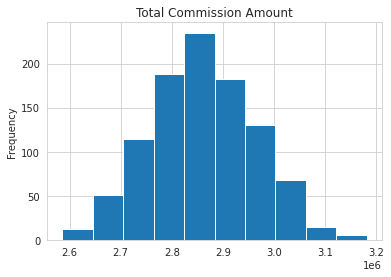

In [22]:
results_df['Commission_Amount'].plot(kind='hist', title="Total Commission Amount")